In [109]:
###### importing the required packages ####

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
##### loading the csv data files #####

match_data = pd.read_csv("H:\Business Analyst\Projects\IPL\IPL_Matches_2008-2020.csv")
ball_data = pd.read_csv("H:\Business Analyst\Projects\IPL\IPL_Ball-by-Ball_2008-2020.csv")

In [111]:
##### reading first 5 rows of match data #####

match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [112]:
##### reading first 5 rows of ball data #####

ball_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [113]:
# checking for null values

match_data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [114]:
# checking for null values

ball_data.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [115]:
#####  to check no of rows and columns ######v
match_data.shape

(816, 17)

In [116]:
print("Matches played so far: ",match_data.shape[0] )   ###### to check no. of matches played so far ####
print("\n Name of cities in which matches held:", match_data['city'].unique()) ##### name of cities ####
print("\n No. of cities in which matches held:", match_data['city'].nunique()) ##### no. of cities ####
print("\n Name of teams participated:", match_data['team1'].unique()) ##### name of teams participated ####
print("\n No. of teams participated:", match_data['team1'].nunique()) ##### no. of teams participated ####

Matches played so far:  816

 Name of cities in which matches held: ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']

 No. of cities in which matches held: 32

 Name of teams participated: ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']

 No. of teams participated: 15


In [117]:
##### extracting year from the date #####
match_data['Season'] = pd.DatetimeIndex(match_data['date']).year
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [118]:
##### to check no. of matches played in each season #####
matches_per_season = match_data.groupby(['Season'])['id'].count()
matches_per_season

Season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
2020    60
Name: id, dtype: int64

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


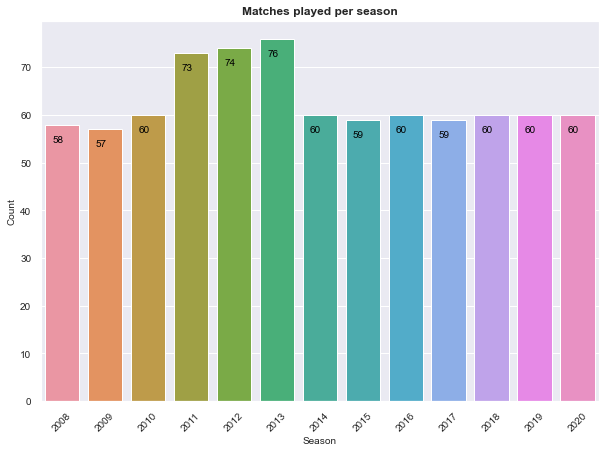

In [119]:
##### bar chart for no. of matches #####
ax = sns.countplot(match_data['Season'])
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Season', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Matches played per season', fontweight='bold')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.3, p.get_height()), ha='center', va='top',color='black', size=10)

In [120]:
##### merging column to another table using left join #####
season_data = match_data[['id','Season']].merge(ball_data, left_on = 'id', right_on = 'id', how='left')

In [121]:
season_run = season_data.groupby(['Season'])['total_runs'].sum()

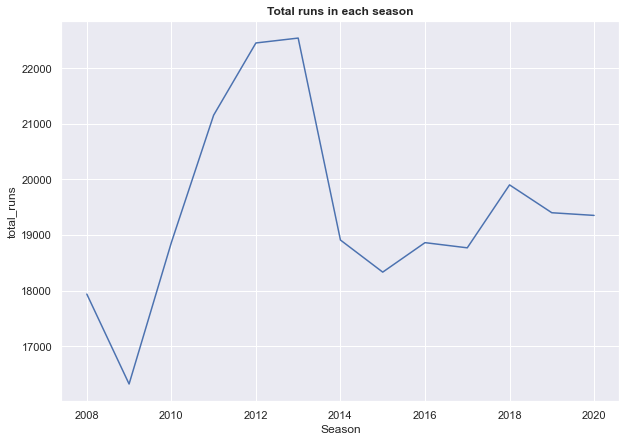

In [170]:
##### plot for showing total runs per season #####
sns.lineplot(data=season_run, palette="magma")
plt.title("Total runs in each season", fontsize=12, fontweight='bold')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

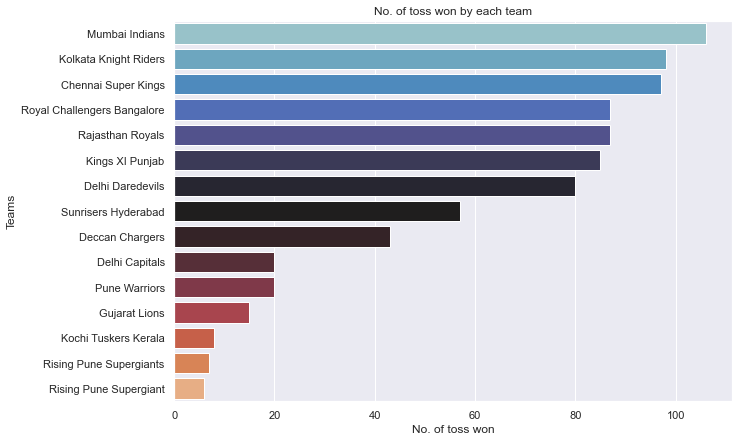

In [123]:
##### plot to show teams vs no. of toss wins #####
toss = match_data['toss_winner'].value_counts()
sns.set(rc={'figure.figsize':(10,7)}, style = 'darkgrid')
sns.barplot(y=toss.index, x=toss, palette="icefire")
plt.xlabel("No. of toss won")
plt.ylabel("Teams")
plt.title("No. of toss won by each team")
plt.show

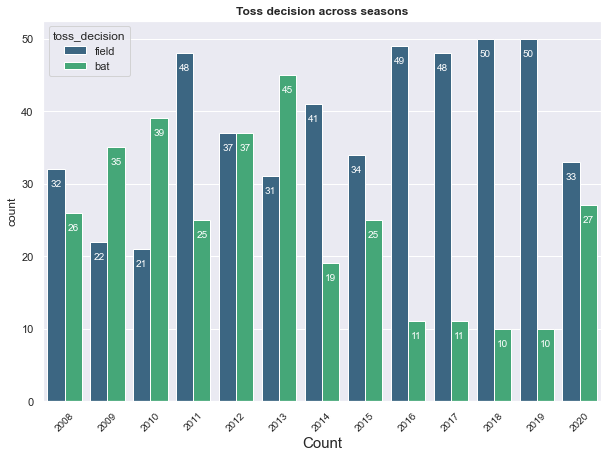

In [124]:
##### plot to show toss trend over seasons #####
ax = sns.countplot(x='Season', hue='toss_decision', data=match_data, palette='viridis')
plt.xticks(rotation=45, fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('Season', fontsize=15)
plt.xlabel('Count', fontsize=15)
plt.title("Toss decision across seasons", fontsize=12, fontweight='bold')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top',color='white', size=10)
    
##### so we can see that in year 2008 out of 58 matches 32 toss won decided to field first #####

In [125]:
##### to check which stadium is best for a team when they won a toss #####
match_data.venue[match_data.toss_winner=='Mumbai Indians'][match_data.winner=='Mumbai Indians'].mode()
##### replace 'Mumbai Indians' with your choice team #####

0    Wankhede Stadium
dtype: object

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

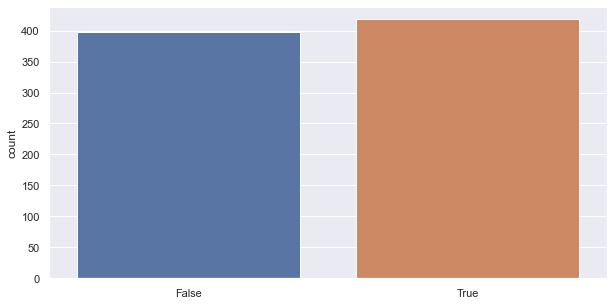

In [128]:
##### graph to check whether winning a toss is winning a match ##### 

toss = match_data["toss_winner"] == match_data["winner"]
plt.figure(figsize=(10,5))
sns.countplot(toss)
plt.show

In [130]:
##### doing some analysis of player #####
player = ball_data['batsman']=='SK Raina'
df_raina = ball_data[player]
df_raina.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
246,335983,1,10,3,SK Raina,MEK Hussey,PP Chawla,2,0,2,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
247,335983,1,10,4,SK Raina,MEK Hussey,PP Chawla,0,0,0,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
248,335983,1,10,5,SK Raina,MEK Hussey,PP Chawla,6,0,6,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
249,335983,1,10,6,SK Raina,MEK Hussey,PP Chawla,4,0,4,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
253,335983,1,11,4,SK Raina,MEK Hussey,K Goel,6,0,6,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab


<function matplotlib.pyplot.show(close=None, block=None)>

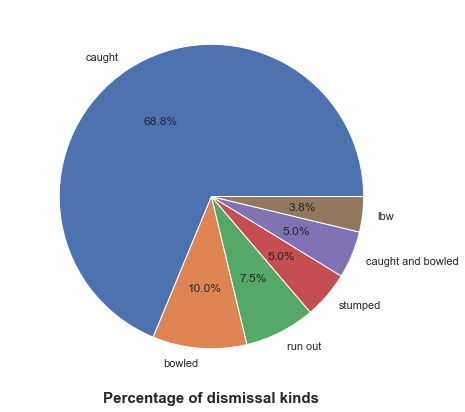

In [137]:
df_raina['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%')
plt.xlabel("Percentage of dismissal kinds", fontsize=15, fontweight='bold')
plt.ylabel(" ")
plt.show

In [138]:
def count(df_raina,runs):
    return len(df_raina[df_raina['batsman_runs']==runs])*runs

In [139]:
print("Runs scored from 1's:", count(df_raina,1))
print("Runs scored from 2's:", count(df_raina,2))
print("Runs scored from 3's:", count(df_raina,3))
print("Runs scored from 4's:", count(df_raina,4))
print("Runs scored from 6's:", count(df_raina,6))

Runs scored from 1's: 1666
Runs scored from 2's: 528
Runs scored from 3's: 33
Runs scored from 4's: 1972
Runs scored from 6's: 1164


<function matplotlib.pyplot.show(close=None, block=None)>

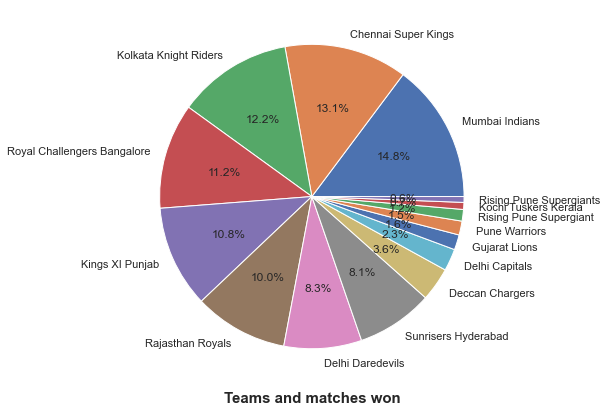

In [141]:
##### plot to check the most winning team #####
match_data['winner'].value_counts().plot.pie(autopct='%1.1f%%')
plt.xlabel("Teams and matches won", fontsize=15, fontweight='bold')
plt.ylabel(" ")
plt.show

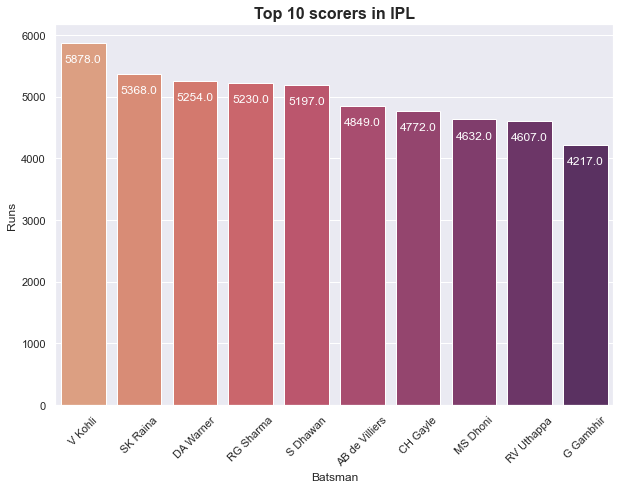

In [163]:
##### to check the batsman who scored the most runs #####
runs = ball_data.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs.columns = ['Batsman', 'Runs']
y = runs.sort_values(by= 'Runs', ascending = False).head(10).reset_index().drop('index', axis=1)


ax = sns.barplot(x=y['Batsman'], y=y['Runs'], palette = 'flare')
plt.xticks(rotation=45)
plt.title('Top 10 scorers in IPL', fontsize = 16, fontweight = 'bold')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top',color='white', size=12)

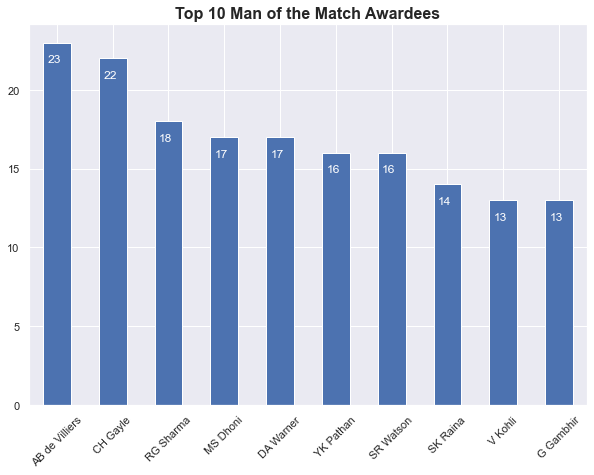

In [169]:
##### players with maximum 'man of the match' award #####
ax = match_data.player_of_match.value_counts()[:10].plot(kind='bar')
plt.xticks(rotation = 45)
plt.title('Top 10 Man of the Match Awardees', fontsize=16,fontweight='bold')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top',color='white', size=12)